### Student Performance Indicator

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import data
df = pd.read_csv("data/StudentsPerformance.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
# Finding rows and columns
df.shape

(1000, 8)

### Data Checks to perform
- Missinig Values
- Duplicates
- Data types
- No. of unique values in each columns
- Statistics of Data Set
- Various categories present in each categorical columns

In [4]:
# Finding Null values
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

There are no missing values

In [5]:
# Check Duplicates
df.duplicated().sum()


0

There are no duplicate records

In [6]:
# Data types
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [7]:
# Unique values in each columns
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [8]:
# Stats of Dataset
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [9]:
# Various categories in each Columns
for col in df.columns:
    print(col," : ", df[col].unique())

gender  :  ['female' 'male']
race/ethnicity  :  ['group B' 'group C' 'group A' 'group D' 'group E']
parental level of education  :  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
lunch  :  ['standard' 'free/reduced']
test preparation course  :  ['none' 'completed']
math score  :  [ 72  69  90  47  76  71  88  40  64  38  58  65  78  50  18  46  54  66
  44  74  73  67  70  62  63  56  97  81  75  57  55  53  59  82  77  33
  52   0  79  39  45  60  61  41  49  30  80  42  27  43  68  85  98  87
  51  99  84  91  83  89  22 100  96  94  48  35  34  86  92  37  28  24
  26  95  36  29  32  93  19  23   8]
reading score  :  [ 72  90  95  57  78  83  43  64  60  54  52  81  53  75  89  32  42  58
  69  73  71  74  70  65  87  56  61  84  55  44  41  85  59  17  39  80
  37  63  51  49  26  68  45  47  86  34  79  66  67  91 100  76  77  82
  92  93  62  88  50  28  48  46  23  38  94  97  99  31  96  24  29  40]
writing score  

In [10]:
# Define numerical and categorical columns
numeric_features = [col for col in df.columns if df[col].dtype!='O']
categorical_features = [col for col in df.columns if df[col].dtype=='O']

print("numeric_features = ", numeric_features)
print("categorical_features = ", categorical_features)

numeric_features =  ['math score', 'reading score', 'writing score']
categorical_features =  ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


### Feature Engineering
- Adding column Total score and Average Score

In [11]:
df['Total_Score'] = df['math score']+df['reading score']+df['writing score']
df['Average'] = df['Total_Score']/3

In [12]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total_Score,Average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [13]:
# No. of students having full marks in each section
math_full = df[df['math score']==100]['math score'].count()
reading_full = df[df['reading score']==100]['reading score'].count()
writing_full = df[df['writing score']==100]['writing score'].count()
print(math_full, reading_full, writing_full)

7 17 14


## Data Visualization

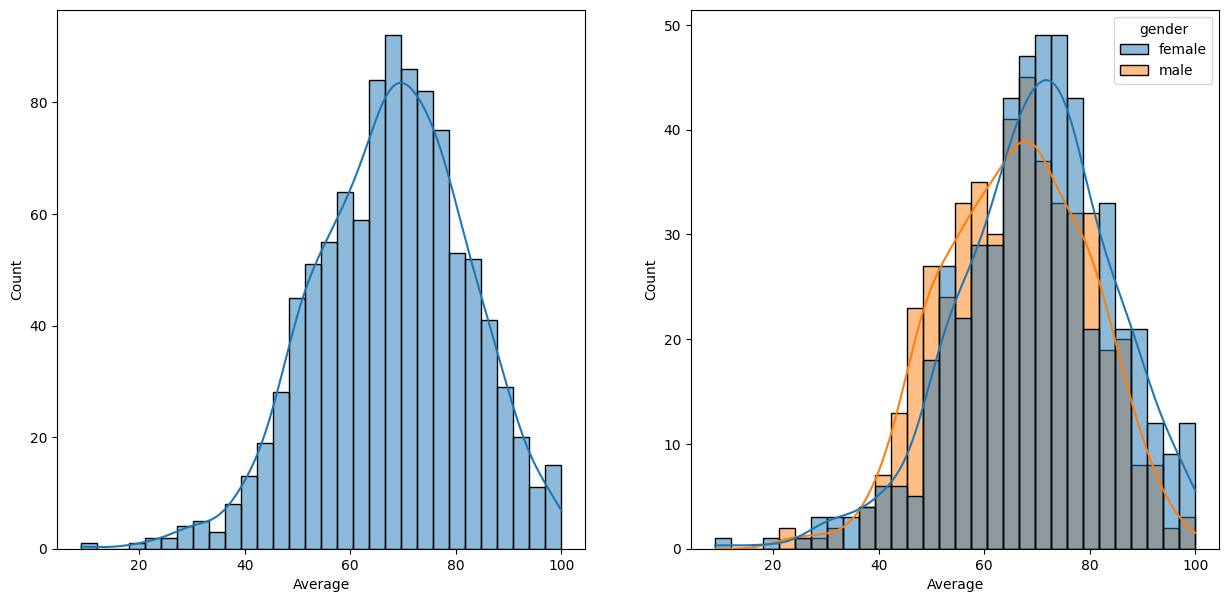

In [14]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df, x='Average', bins=30, kde=True)
plt.subplot(122)
sns.histplot(data=df, x='Average', bins=30, kde=True, hue='gender')
plt.show()

#### Insights
- Female Students perform better than male students

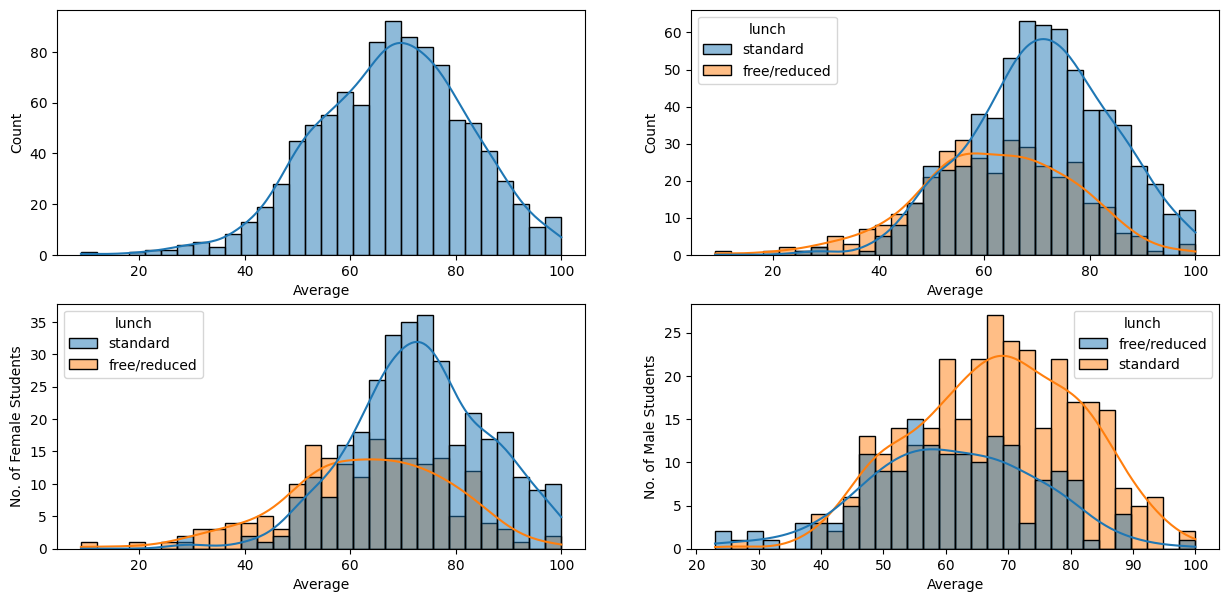

In [17]:
fig, axs = plt.subplots(2, 2, figsize=(15, 7))
plt.subplot(221)
sns.histplot(data=df, x='Average', bins=30, kde=True)
plt.subplot(222)
sns.histplot(data=df, x='Average', bins=30, kde=True, hue='lunch')

plt.subplot(223)
sns.histplot(data=df[df.gender=='female'], x='Average', bins=30, kde=True, hue='lunch')
plt.ylabel("No. of Female Students")

plt.subplot(224)
sns.histplot(data=df[df.gender=='male'], x='Average', bins=30, kde=True, hue='lunch')
plt.ylabel("No. of Male Students")

plt.show()

#### Insights
- Standard Lunch helps perform better in exams for both the genders